# DAT200 CA3 2023

Kaggle username: tonjemartine / Tonje Martine Lorgen Kirkholt


### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
from sklearn import svm, tree
import warnings
warnings.filterwarnings('ignore')

#------------------------------------------------------#
# Importing each of the models from Scikit learn

# Perceptron
from sklearn.linear_model import Perceptron

# Adaline
%run adaline.ipynb

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Suport Vector Classifier
from sklearn.svm import SVC

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
# Random Forests

from sklearn.ensemble import RandomForestClassifier
# K-Nearest Neighbours (KNN)
from sklearn.neighbors import KNeighborsClassifier

#Random Forest
from sklearn.ensemble import RandomForestClassifier

#------------------------------------------------------#
# Importing methods for scaling
from sklearn.preprocessing import StandardScaler

#------------------------------------------------------#
# Importing methods for finding most optimal parameters
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, RepeatedStratifiedKFold



### Reading data

In [2]:
# Reading and loading the data for training and testing
water_train = pd.read_csv('./assets/train.csv', delimiter=',')

water_test = pd.read_csv('./assets/test.csv', delimiter=',')

### Data exploration and visualisation

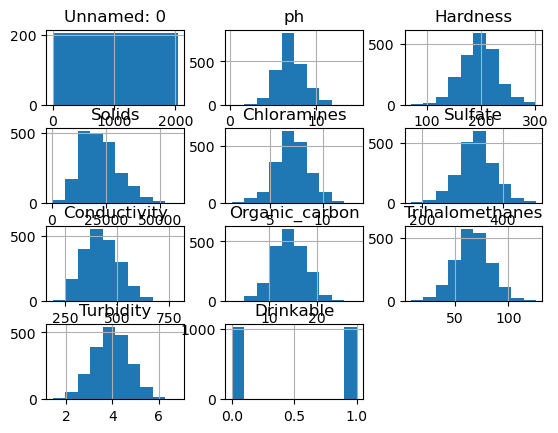

In [3]:
# Looking at each feature in its own histogram

histogram = water_train.hist()

In [4]:
# =============================================================================
# Looking at the descriptive statistics
# =============================================================================

In [5]:
# We can see that the scale differs for several of the features, 
# because of the different mean and std's.
descr_stats = water_train.describe()
descr_stats

,Unnamed: 0,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Drinkable
count,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000,2040.000000
mean,1019.500000,7.045930,195.998874,22005.555875,7.111529,333.349677,424.783924,14.240333,66.311518,3.964849,0.500000
std,589.041594,1.597071,34.284142,8683.483885,1.616997,45.805572,83.757539,3.455875,16.485962,0.792210,0.500123
min,0.000000,0.216124,69.817622,336.989742,1.321327,171.196409,191.538750,2.090000,8.148162,1.417596,0.000000
25%,509.750000,6.033722,174.968973,15566.304215,6.111137,304.722266,361.944320,11.829769,55.539686,3.423092,0.000000
50%,1019.500000,6.958491,197.260049,20977.941519,7.098779,335.207355,419.621502,14.224112,66.318316,3.957272,0.500000
75%,1529.250000,7.998105,216.784623,26971.346790,8.078323,360.990547,481.204843,16.665868,77.048602,4.487263,1.000000
max,2039.000000,14.700000,301.471218,58101.437939,13.286030,483.112422,791.009751,28.357042,126.031581,6.819486,1.000000


<AxesSubplot:>

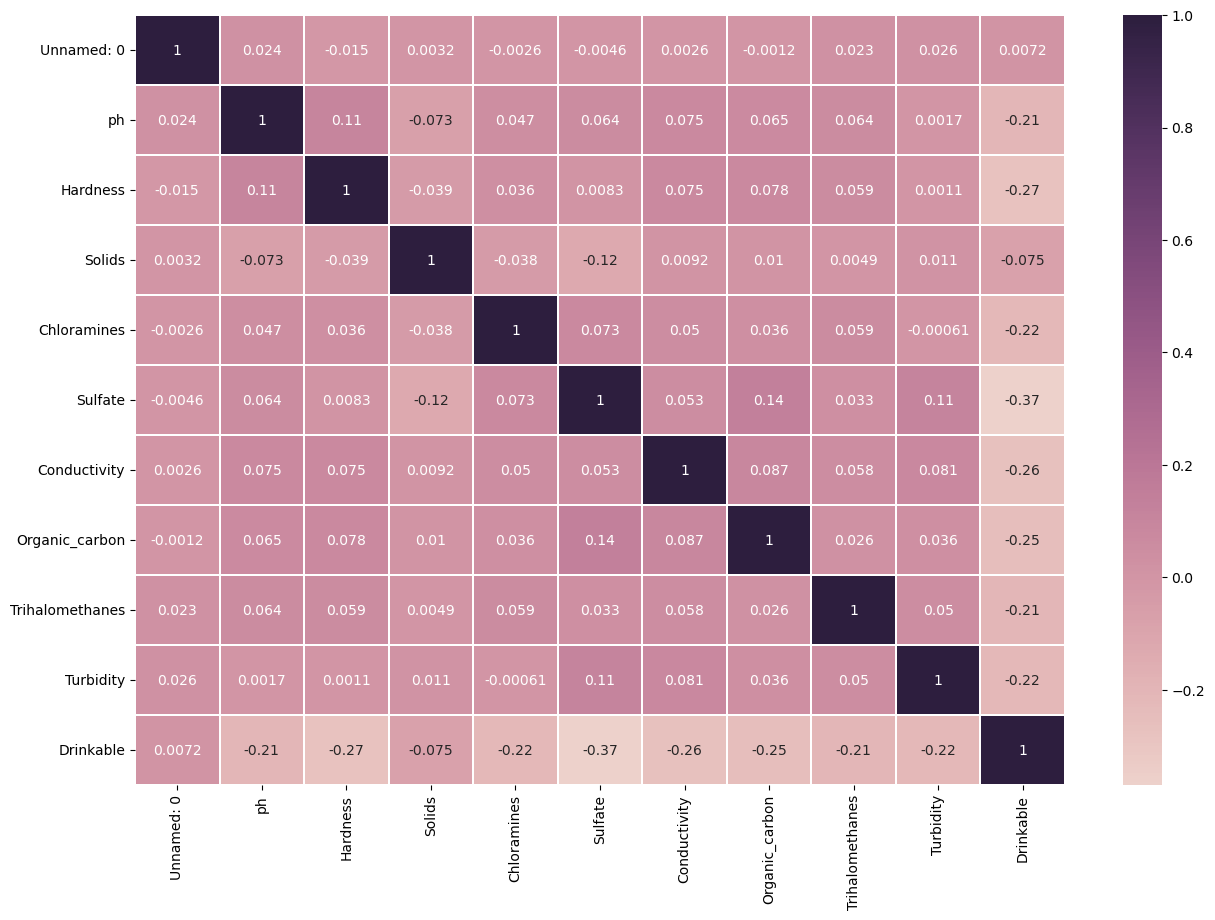

In [6]:
# Looking at a correlation matrix before standardizing the data

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(water_train.corr(), annot=True, linewidth=.3,
            cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

### Data cleaning

In [7]:
# Checking if there are any null-values
water_train.isna().sum()

Unnamed: 0         0
ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Drinkable          0
dtype: int64

In [8]:
# Removing the column "Unnamed: 0", appears to be an extra index-volumn
# with no relevant information
water_train = water_train.iloc[:, 1:11]
water_test = water_test.iloc[:, 1:11]

### Data exploration after cleaning

### Data preprocessing

#### Train test split

In [9]:
# Extracting data columns used for predicting, and target variable which we
# want to predict

# Train
X_train = water_train.iloc[:, :9]
y_train = water_train.iloc[:, 9]

# Test
X_test = water_test.copy()

#### Scaling

###### The scaled data is used in all models, except the Random Forest.

In [10]:
# Using StandardScaler() from sklearn to compute the mean and STD from
# training data
sc = StandardScaler()
sc.fit(X_train)


# Using the calculated mean and STD to standardise both
# training- and test data (X_train and X_test)
X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

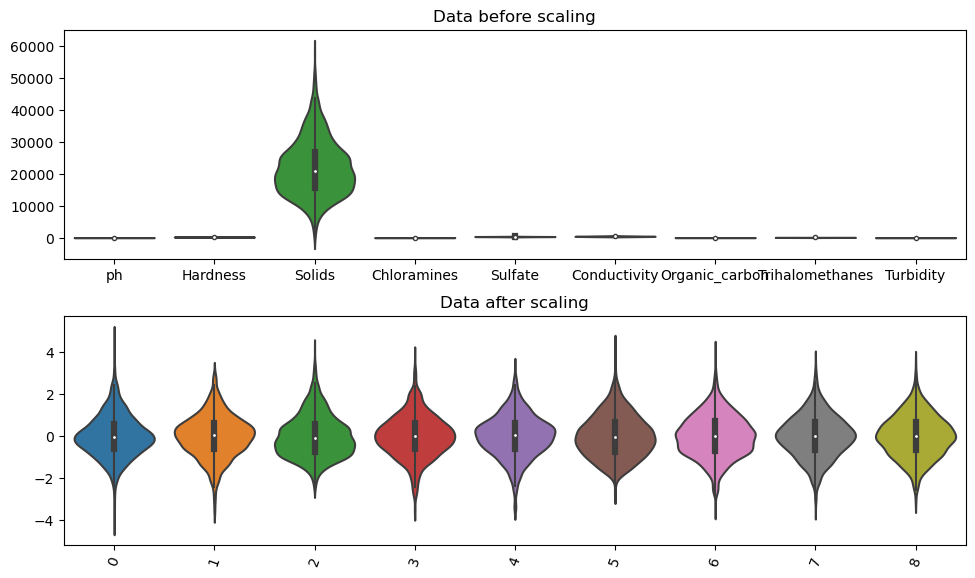

In [11]:
# Visualizing the distribution before and after scaling, using a violin plot to observe
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,6), sharex=False)
fig.tight_layout(pad=2)
ax[0].set_title('Data before scaling')
ax[1].set_title('Data after scaling')
plt.xticks(rotation=70)
X_train_pre_sc= sns.violinplot(data=X_train, scale="count", ax=ax[0])
X_train_post_sc = sns.violinplot(data=X_train_sc, scale="count", ax=ax[1])

### Modelling

For the modelling, I have chosen to test the following models:

* Logistic Regression
* Support Vector Classifier: Linear
* Support Vector Classifier: RBF
* Decision Trees
* Random Forests
* K-Nearest Neighbours

I have included code for all 5 (6) models, just to compare the accuracy results. The one that I landed on as the most optimal model for this data, is the Random Forest model. Therefore, you can scroll past all of the others until you reach this one (almost at the bottom). 

#### Logistic Regression

In [12]:
# =============================================================================
# Training the model : Logistic Regression
# =============================================================================

param_grid = {'penalty':['l2'],
              'C': [0.01, 0.1, 1.0, 10, 100], 
              'solver': ['liblinear', 'newton-cg', 'lbfgs', ]}


clf_logReg = LogisticRegression()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid = GridSearchCV(clf_logReg, param_grid=param_grid, cv=cv)
grid.fit(X_train_sc, y_train)

# Printing out accuracies for training data
clf_logReg_score = grid.score(X_train_sc, y_train)
print('\n Training accuracy:', clf_logReg_score)


y_pred_logReg = grid.predict(X_test_sc)


 Training accuracy: 0.796078431372549


In [13]:
# =============================================================================
# Save result to csv
# =============================================================================
y_result = pd.DataFrame()
y_result['Drinkable'] = np.array(y_pred_logReg)
y_result = y_result.reset_index()

y_result.to_csv(r'./Results/y_result_logReg.csv', index=False)

#### Support Vector Classifier: Linear

In [14]:
# =============================================================================
# Training the model : SVC LINEAR
# =============================================================================

clf_svcLin = svm.SVC(kernel='linear')
clf_svcLin.fit(X_train_sc, y_train)
SVC()

# Printing out accuracies for training data
clf_svcLin_score = clf_svcLin.score(X_train_sc, y_train)
print('\n Training accuracy:', clf_svcLin_score)

y_pred_svcLin = clf_svcLin.predict(X_test_sc)



 Training accuracy: 0.8004901960784314


In [15]:
# =============================================================================
# Save result to csv
# =============================================================================
y_result = pd.DataFrame()
y_result['Drinkable'] = np.array(y_pred_svcLin)
y_result = y_result.reset_index()

y_result.to_csv(r'./Results/y_result_SVM_linear.csv', index=False)
    

#### Support Vector Classifier: RBF

In [16]:
# =============================================================================
# Training the model : SVC RBF
# =============================================================================

clf_svcRbf = svm.SVC(kernel='rbf')
clf_svcRbf.fit(X_train_sc, y_train)
SVC()

# Printing out accuracies for training data
clf_svcRbf_score = clf_svcRbf.score(X_train_sc, y_train)
print('\n Training accuracy:', clf_svcRbf_score)

y_pred_svcRbf = clf_svcRbf.predict(X_test_sc)



 Training accuracy: 0.8725490196078431


In [17]:
# =============================================================================
# Save result to csv
# =============================================================================
y_result = pd.DataFrame()
y_result['Drinkable'] = np.array(y_pred_svcRbf)
y_result = y_result.reset_index()

y_result.to_csv(r'./Results/y_result_SVM_rbf.csv', index=False)
    

#### Decision Trees

In [18]:
# =============================================================================
# Training the model : Decision Trees
# =============================================================================
# Creating the classifier
clf_decsTree = DecisionTreeClassifier(criterion='gini', 
                              max_depth=7, 
                              random_state=1)

# Fitting the data
clf_decsTree.fit(X_train_sc, y_train)

#Predicting the target value
y_pred_decTree = clf_decsTree.predict(X_test_sc)

# Printing out accuracies for training data
clf_decsTree_score = clf_decsTree.score(X_train_sc, y_train)
print('\n Training accuracy:', clf_decsTree_score)


 Training accuracy: 0.9068627450980392


In [19]:
# =============================================================================
# Save result to csv
# =============================================================================
y_result = pd.DataFrame()
y_result['Drinkable'] = np.array(y_pred_decTree)
y_result = y_result.reset_index()

y_result.to_csv(r'./Results/y_result_decisionTrees.csv', index=False)

## Random Forests
### The results from this model have been submitted to Kaggel

In [20]:
# =============================================================================
# Training the model : Random Forest
# =============================================================================
# Trying to find the best hyperparameters for the model, using both
# RandomizedSearchCV and GridSearchCV (not shown in the code)
# The final results for the optimal parameters have been obtained through testing various parameter values.

# n_estimators is the number of decision trees in the forest. 
# max_depth is the maximum depth of each decision tree in the forest. A high
# value here increases the risk for overfitting, and setting the value too
# low can lead to underfitting.

# Creating the classifier
clf_randFor = RandomForestClassifier(criterion='gini',
                             n_estimators=12,
                             max_depth=7,
                             random_state=1,
                             n_jobs=1)

In [21]:
# Fitting the data
clf_randFor.fit(X_train, y_train)

#Predicting the target value
y_pred_rand = clf_randFor.predict(X_test)

# Printing out accuracies for training data
clf_randFor_score = clf_randFor.score(X_train, y_train)
print('\n Training accuracy:', clf_randFor_score)


 Training accuracy: 0.9269607843137255


In [22]:
# =============================================================================
# Save result to csv
# =============================================================================
y_result_rand = pd.DataFrame()
y_result_rand['Drinkable'] = np.array(y_pred_rand)
y_result_rand = y_result_rand.reset_index()

y_result_rand.to_csv(r'./Results/y_result_randomForest.csv', index=False)

#### K-Nearest Neighbours

In [23]:
# =============================================================================
# Training the model : K-NN (K-Nearest Neighbors)
# =============================================================================

# Hyperparameter tuning for K-NN
# Creating a dictionary with values within a certain range for choosing
# parameter values for leaf_size and n_neighbours


param_vals = {'leaf_size': [random.randint(1, 50)],
              'n_neighbors': [random.randint(1, 30)]}



# Creating the classifier
clf_knn = KNeighborsClassifier()

opt_values = RandomizedSearchCV(clf_knn, param_distributions= param_vals,
                                 n_iter=5, cv=5)

# Fitting the data
opt_values.fit(X_train_sc, y_train)

#Predicting the target value
y_pred_knn = opt_values.predict(X_test_sc)


In [24]:
# Saving the prediction
y_result = pd.DataFrame()
y_result['Drinkable'] = np.array(y_pred_knn)
y_result = y_result.reset_index()

y_result.to_csv(r'./Results/y_result_knn.csv', index=False)

In [25]:
# Printing out accuracies for training data
clf_knn_score = opt_values.score(X_train_sc, y_train)
print('\n Training accuracy for K-Nearest Neighbours:', clf_knn_score)


 Training accuracy for K-Nearest Neighbours: 0.8362745098039216


### Final Evaluation

In [26]:
accuracy_results = pd.DataFrame([clf_logReg_score, clf_svcLin_score, clf_svcRbf_score, clf_decsTree_score, clf_randFor_score, clf_knn_score]).T
accuracy_results.columns = ["Logistic Regression", "SVC: Linear", "SCV: RBF", "Decision Trees", "Random Forest", "KNN"]
accuracy_results

,Logistic Regression,SVC: Linear,SCV: RBF,Decision Trees,Random Forest,KNN
0,0.796078,0.80049,0.872549,0.906863,0.926961,0.836275


After training all of the models, and testing submission on kaggle, the most optimal model for this dataset is Random Forest. A higher training accuracy could be obtained by increasing the *n_estimators* and *max_depth*, but this exceeded the score obtained after submitting the results on kaggle. Therefore, the parameters have been adjusted so that training accuracy and the score obtained after submitting the predicted values are giving more similar results. 

The result from me on the leaderboard is from a version of the Random Forest model where, In my opinion, the *max_depth* and *n_estimators* were too high. This resulted in a very high training accuracy, which made me suspect overfitting. After considering all of the results, I decided to not push the hypertuning more to avoid overfitting and adjusted the paramter values to give a better model and result overall.

### Kaggle submission

The submission on Kaggle which is the final and valid result, is 

* *y_result_randomForest.csv*

I have also added the following comment:
*FINAL SUBMISSION: This is the counting submission of the predicted values.*


This upload resulted in a score of 0.92031.